In [1]:
import cmocean as cmo
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset
import seaborn as sns

In [2]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 
          73, 78, 83, 88, 93, 98,]
iters = [xx for xx in range(10,1440*5+10,10)]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels, iters=iters, chunks=None)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels, iters=iters, chunks=None)

In [3]:
depth_nob = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth_nob,0)
mask_dep = np.ma.getmask(dep_masked)

times1 = np.arange(720)*600
times2 = np.arange(720)*1200+(720*600)
times = np.concatenate((times1,times2))

# centers mask bathy with bay
depth_bay = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)
depSVB_masked = np.ma.masked_values(depth_bay,0)

In [4]:
def get_snapshot_at_level(ds,tt,zz,fld):
    W = ds[fld][tt,zz,:,:]
    return(W)

def get_snapshot_eta(ds,tt):
    Eta = ds['ETAN'][tt,:,:]
    return(Eta)

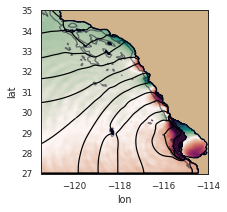

In [5]:
sns.set_context('paper')
sns.set_style('white')
col='k'
zz = 0
zz2 = 50
#tt2 = 525
tt = 494
tt_fw = 500

fig,ax1 = plt.subplots(1,1,figsize=(3,3))
ax1.set_facecolor('tan')
      
Eta_bay = get_snapshot_eta(ds, tt)
Eta_nb = get_snapshot_eta(ds2, tt)

ax1.pcolormesh(lon,lat,np.ma.masked_array((Eta_bay-Eta_nb)*1E4, mask=maskSVB[zz,:,:]),
               cmap=cmo.cm.curl, vmin=-5, vmax=5)

ax1.pcolormesh(lon,lat,np.ma.masked_array((Eta_bay-Eta_nb)*1E4, mask=mask[zz,:,:]),
               cmap=cmo.cm.curl, vmin=-1.5, vmax=1.5)

# Before second node apears, contour ssh in the whole domain: 
for tt in range(23, 30):
    ssh = np.ma.masked_array(ds.ETAN[tt,:,:]-ds2.ETAN[tt,:,:], mask=mask[0,:,:])   
    ax1.contour(LON,LAT,ssh*100,levels=[0], alpha=1, colors=[col])

lati1 = 200
loni2 = 200
loni3 = 315
lati4 = 300

# Second node appears, only contour 1st node in some parts of the domain: 
for tt in range(30, 33):
    ssh = np.ma.masked_array(ds.ETAN[tt,lati1:,:]-ds2.ETAN[tt,lati1:,:], mask=mask[0,lati1:,:])   
    ax1.contour(LON[lati1:,:],LAT[lati1:,:],ssh*100,levels=[0], alpha=1, colors=[col])
    
    ssh = np.ma.masked_array(ds.ETAN[tt,:lati1,:loni2]-ds2.ETAN[tt,:lati1,:loni2], mask=mask[0,:lati1,:loni2])   
    ax1.contour(LON[:lati1,:loni2],LAT[:lati1,:loni2],ssh*100,levels=[0], alpha=1, colors=[col])
    
for tt in range(33,36):
    ssh = np.ma.masked_array(ds.ETAN[tt,lati4:,:loni3]-ds2.ETAN[tt,lati4:,:loni3], mask=mask[0,lati4:,:loni3])   
    ax1.contour(LON[lati4:,:loni3],LAT[lati4:,:loni3],ssh*100,levels=[0], alpha=1, colors=[col])


ax1.contour(lon,lat,depth_nob, levels=[0], color='k')
ax1.contour(lon,lat,depth_bay, levels=[0], color='k')
ax1.contour(lon,lat,depth_bay, levels=[500], color='0.5', alpha=0.5)
  
ax1.set_ylabel('lat')
ax1.set_xlabel('lon')
ax1.set_xlim(-121.5,-114)
ax1.set_ylim(27,35)

plt.savefig('schematic.png', dpi=500, bbox_inches='tight')

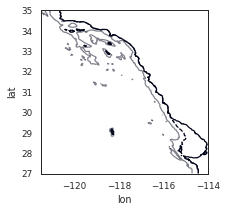

In [6]:
sns.set_context('paper')
sns.set_style('white')
col='k'
zz = 0
zz2 = 50
#tt2 = 525
tt = 494
tt_fw = 500

fig,ax1 = plt.subplots(1,1,figsize=(3,3))
ax1.set_facecolor('white')
#Eta_bay = get_snapshot_eta(ds, tt)
#Eta_nb = get_snapshot_eta(ds2, tt)

#ax1.pcolormesh(lon,lat,np.ma.masked_array((Eta_bay-Eta_nb)*1E4, mask=maskSVB[zz,:,:]),
#               cmap=cmo.cm.curl, vmin=-5, vmax=5)

#ax1.pcolormesh(lon,lat,np.ma.masked_array((Eta_bay-Eta_nb)*1E4, mask=mask[zz,:,:]),
#               cmap=cmo.cm.curl, vmin=-1.5, vmax=1.5)

# Before second node apears, contour ssh in the whole domain: 
#for tt in range(23, 30):
#    ssh = np.ma.masked_array(ds.ETAN[tt,:,:]-ds2.ETAN[tt,:,:], mask=mask[0,:,:])   
#    ax1.contour(LON,LAT,ssh*100,levels=[0], alpha=1, colors=[col])

#lati1 = 200
#loni2 = 200
#loni3 = 315
#lati4 = 300

# Second node appears, only contour 1st node in some parts of the domain: 
# for tt in range(30, 33):
#     ssh = np.ma.masked_array(ds.ETAN[tt,lati1:,:]-ds2.ETAN[tt,lati1:,:], mask=mask[0,lati1:,:])   
#     ax1.contour(LON[lati1:,:],LAT[lati1:,:],ssh*100,levels=[0], alpha=1, colors=[col])
    
#     ssh = np.ma.masked_array(ds.ETAN[tt,:lati1,:loni2]-ds2.ETAN[tt,:lati1,:loni2], mask=mask[0,:lati1,:loni2])   
#     ax1.contour(LON[:lati1,:loni2],LAT[:lati1,:loni2],ssh*100,levels=[0], alpha=1, colors=[col])
    
# for tt in range(33,36):
#     ssh = np.ma.masked_array(ds.ETAN[tt,lati4:,:loni3]-ds2.ETAN[tt,lati4:,:loni3], mask=mask[0,lati4:,:loni3])   
#     ax1.contour(LON[lati4:,:loni3],LAT[lati4:,:loni3],ssh*100,levels=[0], alpha=1, colors=[col])


ax1.contour(lon,lat,depth_nob, levels=[0], color='k', linestyles='--')
ax1.contour(lon,lat,depth_bay, levels=[0], color='k')
ax1.contour(lon,lat,depth_bay, levels=[500], color='0.5', alpha=0.5)
  
ax1.set_ylabel('lat')
ax1.set_xlabel('lon')
ax1.set_xlim(-121.5,-114)
ax1.set_ylim(27,35)

plt.savefig('schematic.png', dpi=500, bbox_inches='tight')

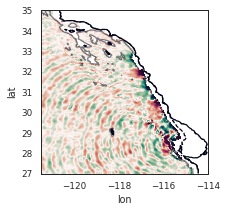

In [14]:
sns.set_context('paper')
sns.set_style('white')

zz = 0
zz2 = 50
#tt2 = 525
tt = 494
tt_fw = 500

fig,ax1 = plt.subplots(1,1,figsize=(3,3))
ax1.set_facecolor('white')
      
Wbay = get_snapshot_at_level(ds, tt_fw, zz2, 'WVEL')
Wnb = get_snapshot_at_level(ds2, tt_fw, zz2, 'WVEL')

pc = ax1.pcolormesh(lon,lat,np.ma.masked_array((Wbay-Wnb)*1E7, mask=mask[zz2,:,:]),
               cmap=cmo.cm.curl, vmin=-25, vmax=25)
ax1.contour(lon,lat,depth_nob, levels=[0], color='k', linestyles='--')
ax1.contour(lon,lat,depth_bay, levels=[0], color='k')
ax1.contour(lon,lat,depth_bay, levels=[500], color='0.5', alpha=0.5)
  
ax1.set_ylabel('lat')
ax1.set_xlabel('lon')
ax1.set_xlim(-121.5,-114)
ax1.set_ylim(27,35)
plt.savefig('schematic_w.png', dpi=500, bbox_inches='tight')